# CS 530 – Final take home exam  (20 points)
## Due: Sunday, May 24 at 11:59am
     ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
**This exam is individual and—unlike the final project—is therefore meant to be taken alone rather than in a group. Please write your name below to certify that you have worked on this exam by yourself and the code written in this exam as well as all the text explaining your results is yours and yours alone or code that you yourself have found only legitimately and in the public domain on the internet. You have not discussed this exam with anyone else and certainly have not used code, text, or other information from anyone in any part of the exam below. You have also not shared any code or text that you have written with anyone else.<br>
Your name: _____________________________________________________ <br>**


Make sure you submit your zipped file (Jupyter notebook + CSV file) to Canvas after you finish this exam (do not attach the dataset). In addition, we strongly encourage you to do all of the following to minimize loss of points of this exam:
<li>   Double check and make sure that all your code blocks runs smoothly. This should be the very last thing you do before submitting. If you then change just one little thing in the code, check again that it all runs well before submitting. Submitting code that does not run will be highly detrimental for your grade.
<li>   The Jupyter notebook should be readable, well designed and styled. It should look like a report to solve an important problem (not something put together hastily and haphazardly). Clean up your block outputs. Do not leave anything that might be confusing for the reader. In this exam, just like in real life, if your report is confusing to the reader, that is on you and not on the reader. One way to achieve this is to finish the exam well in advance of the deadline, go do something else for a day or two, and then read your submission carefully again. You will typically find that many things that were supposedly clear to you when you read the submission just after finishing writing it all no longer make sense when you read it a few days later. Naturally, if it is not clear to you a few days later, it would not be clear to any other reader too. This will give you a chance to modify your submission before finally submitting it.

     
     ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




**In the questions below, make sure to use the appropriate goodness of fit measures in your discussion (R^2, adjusted R^2, AIC, BIC, accuracy, ROC AUC, ...). When you carry out any improvements you think you can make to the machine-learning models you build, you should explain whether they work, and—importantly—why. Visualizing the dataset and plotting various graphs as discussed below is important. But you must convince us that you understand why you got the results that you did**

(8 points)  Q1. Load the dataset in the zip file with the below code:

In [1]:
import numpy as np
import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten,BatchNormalization
from keras.optimizers import SGD, Adadelta, RMSprop
from keras_preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

In [2]:

xtrain = np.loadtxt('xtrain.csv')
xtest = np.loadtxt('xtest.csv')
ytrain = np.loadtxt('ytrain.csv')
ytest = np.loadtxt('ytest.csv')
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(47520, 784) (6480, 784) (47520,) (6480,)


This dataset consists of 47,520 training samples and 6,480 test samples. Each example is a 28x28 grayscale image, associated with a label from 1 of 9 possible classes. 

In this question, you will design a classification neural network. When asked to discuss various effects below, discussing them in relation to the bias-variance tradeoff is likely to be useful. 

<li> a) Visualize this dataset (5 samples for each class).<br>
<li> b) Do the data preprocessing for your neural network. <br>
<li> c)Use the Keras package and train a neural network to achieve at least 90% accuracy on the test set. Explain the architecture you chose—i.e., the number of layers, their width, the neuron types, the activation functions, etc. 
<li>d) Use at least 3 regularization techniques to improve the accuracy of the network you designed in part (a). Describe the improvement in the classification accuracy that you get from each technique. Explain why each technique worked or did not work.  <br>
<li>e) Augment the training dataset (x2 and x3) and test your model. Which augmentation methods did you use? Explain why it did or did not improve the accuracy.  <br>

**For part c, d, and e, plot the loss function and accuracy**



In [3]:
xtrain = xtrain.reshape((xtrain.shape[0], 28, 28, 1))
xtest = xtest.reshape((xtest.shape[0], 28, 28, 1))
print(xtrain.shape)


(47520, 28, 28, 1)


## Visualisations:

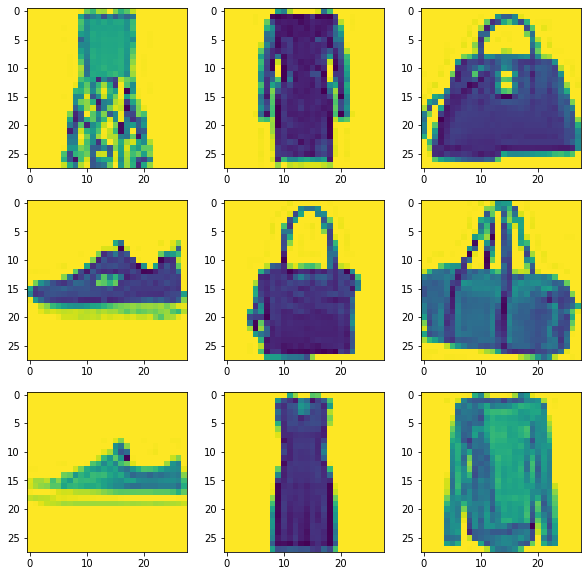

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(3, 3, figsize=(10,10))

r1 = xtrain[1]
rowData1 = r1.reshape(28, 28)
r2 = xtrain[2]
rowData2 = r2.reshape(28, 28)
r3 = xtrain[3]
rowData3 = r3.reshape(28, 28)
r4 = xtrain[4]
rowData4 = r4.reshape(28, 28)
r5 = xtrain[5]
rowData5 = r5.reshape(28, 28)
r6 = xtrain[6]
rowData6 = r6.reshape(28, 28)
r7 = xtrain[7]
rowData7 = r7.reshape(28, 28)
r8 = xtrain[8]
rowData8 = r8.reshape(28, 28)
r9 = xtrain[9]
rowData9 = r9.reshape(28, 28)



axs[0,0].imshow(rowData1)
axs[0,1].imshow(rowData2)
axs[0,2].imshow(rowData3)
axs[1,0].imshow(rowData4)
axs[1,1].imshow(rowData5)
axs[1,2].imshow(rowData6)
axs[2,0].imshow(rowData7)
axs[2,1].imshow(rowData8)
axs[2,2].imshow(rowData9)


## Pre-processing:

1) Rescale X and Y between 0 and 1 by dividing by 255
2) Cast Y to Categorical Values and reshape based on number of classes (9 in this case)

In [5]:
### your code for part b
batch_size = 128
num_classes = 9
epochs = 20

# pre-processing
# rescale data to be between 0 and 1
xtrain /= 255.
xtest /= 255.
ytrain -= 247
ytest -= 247

print(ytrain)
print(ytest)
ytrain = keras.utils.to_categorical(ytrain, num_classes)
ytest = keras.utils.to_categorical(ytest, num_classes)

print(ytrain.shape)
print(ytest.shape)

[2. 5. 5. ... 3. 6. 5.]
[2. 0. 4. ... 4. 1. 4.]
(47520, 9)
(6480, 9)


## Layer Decisions

Due to the similarity between this and HW12, I used a very similar layer structure as I did in that HW, but instead of
chaining just Conv2D Layers, I chained Conv2D and MaxPooling2D Layers, with a consistent drop out to avoid over-fitting,
ending with fully connected layers for the output classification


### Convolution Layers

As the input to this problem is a 2d image, convolutional 2d layers were a natural choice. Convlutional layers work well
for images as they are able to group small areas into the image into distinct features, under the idea that pixels closer
together are more highly related than those further apart.

The strides can be thought of as how far away centre-point the layer should look at when it's looking across the image.
In my case, I tend to like the stride to start a bit larger, so that each 'window' is a bit wider to first identify features.
As the image is reduced in size over the layers, I reduce the strides in tandem until eventually we look pixel by pixel for
identifying features.

RELU seems to be the standard suggestion for images as each pixel is either 'on' at some intensity or 'off' maxing RELU's
lower bound of 0 a good fit.

### Pooling Layers

Pooling layers are required for feature reduction. We dont' need as many of these as we do convolutional layers, but we
do still require them in order to reduce the identifying features as our image goes through each convolution. As each layer
essentially causes the image to become less and less recognizable (to a human) there are also less and less features needed
to identify an image, which is one of the goals of the convolutionl network to begin with. 


### Dropout
Not true layers, assigns a probability of dropping each neuron to reduce overfitting. I used one of these as they helped to marginally push accuracy to just about 90%.

### Flatten

Also not true layers, they flatten our nodes to being 1 dimensional so that our Dense Layers can do their classification on a
single dimensional object instead of a 28x28 object.

### Dense Layers
Used for our output. These are fully connected doing simple matrix multiplication. I started with 1 layer of size 9(number of classes) then continued up by Nx9 from there, 3 total layers seemed to give the best accuracy.


### Optimization Function

I just played around with various optimizers. RMSprop was the fastest to run and still gave decent accuracy, so that's what
I went with. There were 45 epochs necessary to get accuracy and val_accuracy to just at 90%


In [6]:
### your code for part c
reg = Sequential()

reg.add(Conv2D(num_classes * 4, (4, 4), strides=(1, 1), activation="relu", input_shape=(28, 28, 1)))
reg.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
reg.add(Dropout(0.15))

reg.add(Conv2D(num_classes * 4, (3, 3), strides=(1, 1), activation="relu"))
reg.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

reg.add(Conv2D(num_classes * 3, (2, 2), strides=(1, 1), activation="relu"))
reg.add(MaxPooling2D(pool_size=(1, 1), strides=(1,1), padding='same'))
reg.add(Flatten())

reg.add(Dense(num_classes * 3, activation='relu'))
reg.add(Dense(num_classes * 2, activation='relu'))
reg.add(Dense(num_classes, activation='softmax'))

reg.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0005), metrics=['accuracy'])
reg.summary()

reg_hist = reg.fit(xtrain, ytrain, batch_size=batch_size, epochs=45, validation_data=(xtest, ytest))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 36)        612       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 36)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 36)          11700     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 36)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 27)          3915      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 27)        

Epoch 41/45
47520/47520 [==============================] - 20s 412us/step - loss: 0.2226 - accuracy: 0.9185 - val_loss: 0.2866 - val_accuracy: 0.9008
Epoch 42/45
47520/47520 [==============================] - 19s 406us/step - loss: 0.2207 - accuracy: 0.9193 - val_loss: 0.2668 - val_accuracy: 0.9063
Epoch 43/45
47520/47520 [==============================] - 19s 407us/step - loss: 0.2183 - accuracy: 0.9210 - val_loss: 0.2608 - val_accuracy: 0.9074
Epoch 44/45
47520/47520 [==============================] - 20s 413us/step - loss: 0.2152 - accuracy: 0.9212 - val_loss: 0.2814 - val_accuracy: 0.8974
Epoch 45/45
47520/47520 [==============================] - 19s 407us/step - loss: 0.2132 - accuracy: 0.9227 - val_loss: 0.2687 - val_accuracy: 0.9065


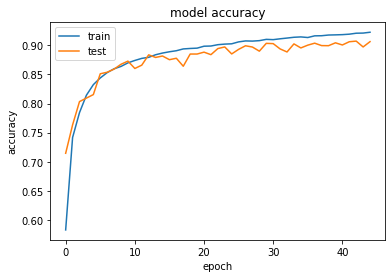

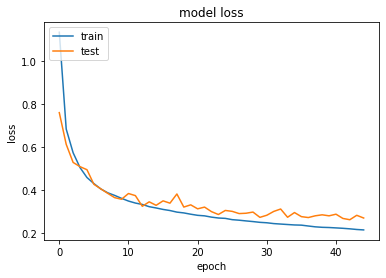

In [7]:
plt.plot(reg_hist.history['accuracy'])
plt.plot(reg_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# "Loss"
plt.plot(reg_hist.history['loss'])
plt.plot(reg_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Regularisation

### L1 Regularisation + Additional Dropout

Adding dropout regularisation reduced the accuracy and val_accuracy of the model, but that is not necessarily a bad thing.
We see that there is a higher difference in performance against the training and test set with the regularlisation methods, which suggests we are reducing some overfitting in the model that could have caused artificial inflation of the original accuracy measures.


In [8]:
### your code for part d
from keras.regularizers import l1,l2,l1_l2
reg2 = Sequential()

reg2.add(Conv2D(num_classes * 4, (4, 4), strides=(1, 1), activation="relu", input_shape=(28, 28, 1)))
reg2.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))


reg2.add(Conv2D(num_classes * 4, (3, 3), strides=(1, 1), activation="relu",kernel_regularizer=l1(0.01)))
reg2.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
reg2.add(Dropout(0.1))
reg2.add(Conv2D(num_classes * 3, (2, 2), strides=(1, 1), activation="relu", bias_regularizer=l1(0.01)))
reg2.add(MaxPooling2D(pool_size=(1, 1), strides=(1,1), padding='same'))
reg2.add(Dropout(0.15))


reg2.add(Flatten())
reg2.add(Dense(num_classes * 3, activation='relu'))
reg2.add(Dense(num_classes * 2, activation='relu'))
reg2.add(Dense(num_classes, activation='softmax'))

reg2.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0005), metrics=['accuracy'])
reg2.summary()

reg2_history = reg2.fit(xtrain, ytrain, batch_size=batch_size, epochs=45, validation_data=(xtest, ytest))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 36)        612       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 36)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 36)          11700     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 36)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 36)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 27)          3915      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 27)         

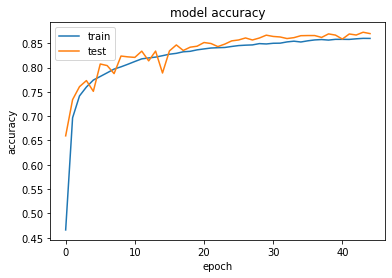

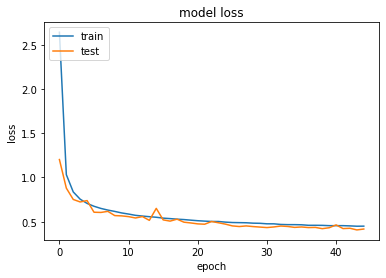

In [9]:
plt.plot(reg2_history.history['accuracy'])
plt.plot(reg2_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# "Loss"
plt.plot(reg2_history.history['loss'])
plt.plot(reg2_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### L2 Kernel + Bias Regularisation + DropOut
Kernel and Bias Ridge (L2) Regularisation used to reduce overfitting through reduction of weights used in final
regression and bias term and dropout from above, still an accuracy reduction over base.

In [10]:
### your code for part d
reg3 = Sequential()

reg3.add(Conv2D(num_classes * 4, (4, 4), strides=(1, 1), activation="relu", input_shape=(28, 28, 1)))
reg3.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
reg3.add(Dropout(0.2))

reg3.add(Conv2D(num_classes * 4, (3, 3), strides=(1, 1), activation="relu",kernel_regularizer=l1(0.001)))
reg3.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

reg3.add(Conv2D(num_classes * 3, (2, 2), strides=(1, 1), activation="relu",kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
reg3.add(MaxPooling2D(pool_size=(1, 1), strides=(1,1), padding='same'))
reg3.add(Dropout(0.2))


reg3.add(Flatten())
reg3.add(Dense(num_classes * 3, activation='relu'))
reg3.add(Dense(num_classes * 2, activation='relu'))
reg3.add(Dense(num_classes, activation='softmax'))

reg3.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0005), metrics=['accuracy'])
reg3.summary()

reg3_history = reg3.fit(xtrain, ytrain, batch_size=batch_size, epochs=45, validation_data=(xtest, ytest))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 25, 25, 36)        612       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 36)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 9, 9, 36)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 36)          11700     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 36)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 27)          3915      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 27)         

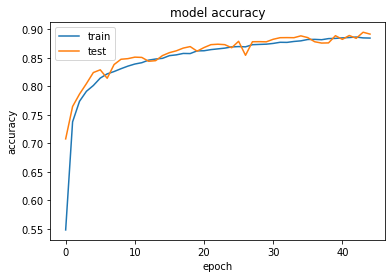

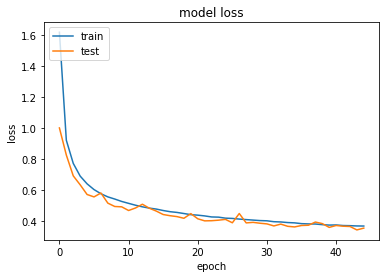

In [11]:
plt.plot(reg3_history.history['accuracy'])
plt.plot(reg3_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# "Loss"
plt.plot(reg3_history.history['loss'])
plt.plot(reg3_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### L1, L2 Kernel Regularisation (Elastic Net) + Dropout
Kernel and Bias Elastic Net (L1+L2) Regularisation used to reduce overfitting through reduction of weights used in final
regression and bias term. Overall accuracy decresased, but there was better performance on the test set.




## Regularisation Results
After trying many regularisation methods, I have been unable to find any additional changes to dropout that resulted in an increase in accuracy. I think this is likely due to the original model being overfitted to the point of inflating accuracy, and each of the regularisation models are removing that overfitting. However, I would expect that the bias regularisation would assist in increasing the accuracy a bit, as our bias increases a bit when we regularise due to the bias variance tradeoff, so for accuracy to still be reduced with bias regularisation as well, there may be more going on than just overfitting.


In [12]:

### your code for part d
reg4 = Sequential()

reg4.add(Conv2D(num_classes * 5, (4, 4), strides=(1, 1), activation="relu", input_shape=(28, 28, 1)))
reg4.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
reg4.add(Dropout(0.15))
reg4.add(Conv2D(num_classes * 4, (3, 3), strides=(1, 1), activation="relu",kernel_regularizer=l1(0.001)))
reg4.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

reg4.add(Conv2D(num_classes * 3, (2, 2), strides=(1, 1), activation="relu", kernel_regularizer=l1_l2(0.001,0.001), bias_regularizer=l1_l2(0.01,0.01)))
reg4.add(MaxPooling2D(pool_size=(1, 1), strides=(1,1), padding='same'))
reg4.add(Dropout(0.15))

reg4.add(Flatten())
reg4.add(Dense(num_classes * 3, activation='relu'))
reg4.add(Dense(num_classes * 2, activation='relu', kernel_regularizer=l1_l2(0.001,0.001), bias_regularizer=l1_l2(0.01,0.01)))
reg4.add(Dense(num_classes, activation='softmax'))

reg4.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0005), metrics=['accuracy'])
reg4.summary()

reg4_history = reg4.fit(xtrain, ytrain, batch_size=batch_size, epochs=45, validation_data=(xtest, ytest))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 25, 25, 45)        765       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 9, 45)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 9, 9, 45)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 36)          14616     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 36)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 27)          3915      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 27)         

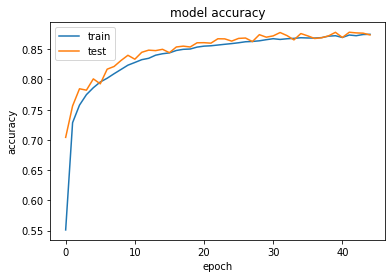

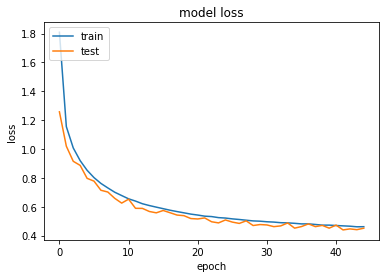

In [13]:
plt.plot(reg4_history.history['accuracy'])
plt.plot(reg4_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# "Loss"
plt.plot(reg4_history.history['loss'])
plt.plot(reg4_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Augmentation

### Image Expansion

First augmentation is simply making the image larger. As these are relatively small images with small features, we want to keep
the aspect rati, so we'll try increasing the height and width by 50%.

Accuracy seemed to start at a higher value with the first augmentation. However, it struggled to make it past ~80%. I would assume that this is because some of the features became too similar as the image became larger, as well as using a relatively small stride value overall, which could lead to many greater similarity between classes

In [14]:
### your code for part e
from keras_preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.5, height_shift_range=0.5)
# prepare iterator
it_gen = datagen.flow(xtrain, ytrain, batch_size=128)

from keras.regularizers import l1,l2,l1_l2
aug = Sequential()

aug.add(Conv2D(num_classes * 4, (4, 4), strides=(1, 1), activation="relu", input_shape=(28, 28, 1)))
aug.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
aug.add(Dropout(0.15))

aug.add(Conv2D(num_classes * 4, (3, 3), strides=(1, 1), activation="relu"))
aug.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

aug.add(Conv2D(num_classes * 3, (2, 2), strides=(1, 1), activation="relu"))
aug.add(MaxPooling2D(pool_size=(1, 1), strides=(1,1), padding='same'))
aug.add(Flatten())

aug.add(Dense(num_classes * 3, activation='relu'))
aug.add(Dense(num_classes * 2, activation='relu'))
aug.add(Dense(num_classes, activation='softmax'))

aug.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0005), metrics=['accuracy'])
aug.summary()

# fit model
aug_history = aug.fit_generator(it_gen, epochs=45, validation_data=(xtest, ytest), steps_per_epoch=len(xtrain) // 64)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 25, 25, 36)        612       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 9, 9, 36)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 9, 9, 36)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 36)          11700     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 36)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 27)          3915      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 27)         

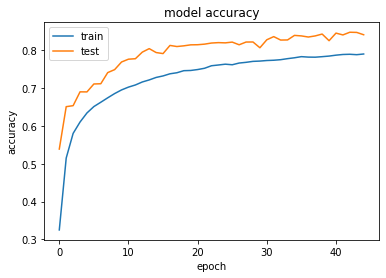

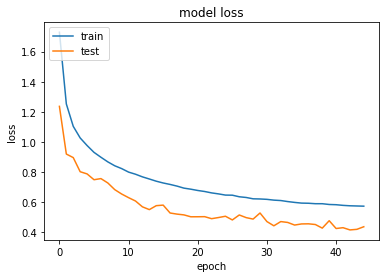

In [15]:
plt.plot(aug_history.history['accuracy'])
plt.plot(aug_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# "Loss"
plt.plot(aug_history.history['loss'])
plt.plot(aug_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Image Translation Flip

The next iteration we'll try flipping the image horizontally. Accuracy was higher in comparison to the scaling of the image. This provided the first major increase in accuracy above 90%, likely due to the feature space of the images being a bit better defined over the original images.

In [16]:
### your code for part e
from keras_preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it_gen = datagen.flow(xtrain, ytrain, batch_size=128)

from keras.regularizers import l1,l2,l1_l2
aug2 = Sequential()

aug2.add(Conv2D(num_classes * 4, (4, 4), strides=(1, 1), activation="relu", input_shape=(28, 28, 1)))
aug2.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
aug2.add(Dropout(0.15))

aug2.add(Conv2D(num_classes * 4, (3, 3), strides=(1, 1), activation="relu"))
aug2.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

aug2.add(Conv2D(num_classes * 3, (2, 2), strides=(1, 1), activation="relu"))
aug2.add(MaxPooling2D(pool_size=(1, 1), strides=(1,1), padding='same'))
aug2.add(Flatten())

aug2.add(Dense(num_classes * 3, activation='relu'))
aug2.add(Dense(num_classes * 2, activation='relu'))
aug2.add(Dense(num_classes, activation='softmax'))

aug2.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0005), metrics=['accuracy'])
aug2.summary()

# fit model
aug2_history = aug2.fit_generator(it_gen, epochs=45, validation_data=(xtest, ytest), steps_per_epoch=len(xtrain) // 64)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 25, 25, 36)        612       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 9, 9, 36)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 9, 9, 36)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 36)          11700     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 36)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 27)          3915      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 3, 3, 27)         

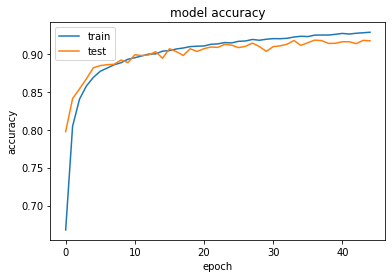

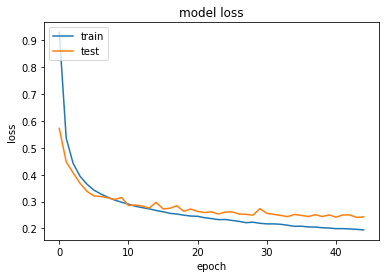

In [17]:
plt.plot(aug2_history.history['accuracy'])
plt.plot(aug2_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# "Loss"
plt.plot(aug2_history.history['loss'])
plt.plot(aug2_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(8 points) Q2. Try at least 2 others classical (non-neural-network) machine-learning algorithms that we covered in this class to classify the same dataset. Make sure to tune any hyper-parameters of the models and plot the accuracy as a function of the values of those parameters. Explain those plots. What accuracies do you get? Why did the accuracies increase or decrease with relation to the values of the hyper-parameters? Discussing this with the bias-variance tradeoff in mind will likely be useful. How do these compare to the accuracies you got in Q1? Explain why the accuracies are higher, lower, or similar in terms of the assumptions, strengths, and weaknesses of the classification techniques you used in Q1 and Q2. Use the same data augmentation techniques that you used in Q1c with these algorithms. Compare the change in accuracy due to augmentation that you got here and that in Q1c. Explain any differences you might find.

## PCA and LDA Classification


In [18]:
### your code
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

xtrain = np.loadtxt('xtrain.csv')
xtest = np.loadtxt('xtest.csv')
ytrain = np.loadtxt('ytrain.csv')
ytest = np.loadtxt('ytest.csv')
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(47520, 784) (6480, 784) (47520,) (6480,)


In [19]:
xtrain /= 255.
xtest /= 255.



### PCA + Logistic Regression Pipeline Classification
Hyperparameters; N_Components, check accuracy based on increasing number of components from 1 to 100. Going above ~20, with anything above ~40 resulting in fractions of a percent increased accuracy, but we pretty quickly approach a limit of accuracy around 85%. 


PCA largely increases in accuracy as we add more components, but but with a plateau after about 5 components before increasing again aftr about 10, which is interesting.I'm not entirely sure why that happens, but after that the accuracy continues to increase at a decreasing rate, approaching about 85% at its best. 

I would have expected PCA to do a little better, as it behaves similarly to a CNN just across a different space. Where the CNN will try to group on similar pixels and doing a sort of iterative feature reduction, PCA is achieving through the raw data of each input matrix. One explanation for hte accuracy difference is that there is more similarity in the raw data of the images, which makes sense when you look at the pictures. CNN can look at edges and shapes, where PCA is effectively just seeing that the colors are very similar in pixel 700 in so many images. 

PCA is not necessarily a bad fit for image recognition, but I think it suffers in this case where the images share too many similarities in such a way that most of the underlying data is the same.

In [20]:
from sklearn import decomposition
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

scores = np.array([])
for i in range(100):
    xt = xtrain # reset each iteration to prevent weirdness
    yt = ytrain
    x = xtest
    y = ytest
    pca = decomposition.PCA(n_components=i+1)
    pca.fit(xt)
    xt_train = pca.transform(xt)
    xt_test = pca.transform(x)
    
    cls = LogisticRegression(solver='lbfgs', dual=False) 
    pipe = Pipeline([('pca', pca), ('logistic', cls)])
    pipe.fit(xt_train, yt)
    predictions = pipe.predict(xt_test)
    score = pipe.score(xt_test, y)
    scores = np.append(scores, [score])
    print('components used', i+1,'. score', score)

components used 1 . score 0.2770061728395062
components used 2 . score 0.5337962962962963
components used 3 . score 0.6253086419753087
components used 4 . score 0.6623456790123456
components used 5 . score 0.7024691358024692
components used 6 . score 0.7103395061728395
components used 7 . score 0.7171296296296297
components used 8 . score 0.7435185185185185
components used 9 . score 0.7600308641975309
components used 10 . score 0.7612654320987654
components used 11 . score 0.7774691358024691
components used 12 . score 0.7800925925925926
components used 13 . score 0.7853395061728395
components used 14 . score 0.7921296296296296
components used 15 . score 0.7913580246913581
components used 16 . score 0.7950617283950617
components used 17 . score 0.7992283950617284
components used 18 . score 0.7996913580246914
components used 19 . score 0.8058641975308642
components used 20 . score 0.808179012345679
components used 21 . score 0.807716049382716
components used 22 . score 0.8078703703703703

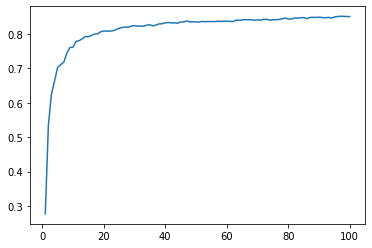

In [21]:
xp = np.linspace(1,100, 100)
plt.plot(xp, scores)


### LDA Image Classification

I figured the best comparison for PCA would end up being LDA as they are both a form of linear transformation on the dataset, with LDA being supervised compared to PCA's unsupervised learning.

SVD was chosen due to the high number of features to reduce the computation time. The same pipleli8kne was used for the LDA classification as the PCA for a better comparison.

I expected LDA and PCA to behave similarly. The distribution of the data may not be considered uniform, in which case LDA may perform worse than PCA as LDA can favor the most common classification. LDA requiring output labels doesn't harm us as we are trying to classify each image based on a label, making it a decent fit for the dataset.

LDA started at a higher accuracy than PCA with the same number of components, but its performance increases were a little smoother than what we see in PCA, it still began to taper off and approach a limit, but it saccuracy quickly tapered off and flattened out to 83.7% at ~8 components. Tolerance also didn't appear to change the accuracy by a significant degree.

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldaScores = np.array([])
for i in range(10):
    xt = xtrain # reset each iteration to prevent weirdness
    yt = ytrain
    x = xtest
    y = ytest
    lda = LinearDiscriminantAnalysis(n_components=i+1, solver='svd', tol = 0.01 * (i+1)) 
    xl_train = lda.fit_transform(xt, yt)
    xl_test = lda.transform(x)

    cls = LogisticRegression(solver='lbfgs', dual=False) 
    lda_pipe = Pipeline([('lda', lda), ('logistic', cls)])
    lda_pipe.fit(xl_train, yt)
    predictions = lda_pipe.predict(xl_test)
    score = lda_pipe.score(xl_test, y)
    ldaScores = np.append(ldaScores, [score])
    print('components used',i+1,'. score', score)

components used 1 . score 0.49459876543209874
components used 2 . score 0.6228395061728395
components used 3 . score 0.6706790123456791
components used 4 . score 0.7251543209876543
components used 5 . score 0.7472222222222222
components used 6 . score 0.7805555555555556
components used 7 . score 0.8268518518518518
components used 8 . score 0.8376543209876544
components used 9 . score 0.8378086419753087
components used 10 . score 0.8378086419753087


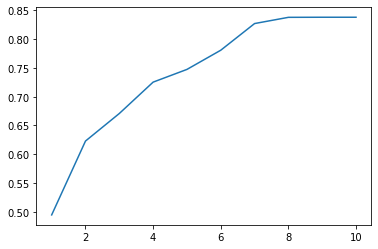

In [23]:
xl = np.linspace(1, 10, 10)
plt.plot(xl, ldaScores)


(4 points) Q3. So far, we gave you both the training set and the test set for your models. But that is not what happens in real life. In real life, you prepare your model based on the training set to evaluate it on a test set to which you will have access only at some point in the future. To simulate that situation better, we are adding this question, which is related to evaluating your algorithms in Q1 and Q2 for predicting previously unseen data. On Friday, 5/22 at 12:01am, we will send you a collection of new samples without their associated labels. Your job is to run the algorithms you created for Q1 and Q2 on this new dataset and create a CSV file with 3 columns, which includes the labels that you predicted with your 3 proposed algorithms in the following order: first column is the NN from Q1, second column is the first model from Q2, and third column is the second model from Q2. You need to upload this CSV file to Canvas as your answer to this question. 

(1080, 784)
(1080, 28, 28, 1)


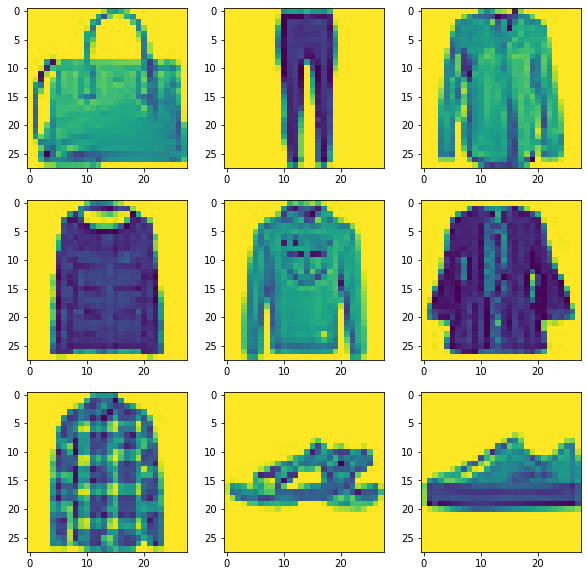

In [24]:
xnew = np.loadtxt('xnew.csv')
print(xnew.shape)
xnew_cnn = xnew.reshape((xnew.shape[0], 28, 28,1))
xnew_cnn /= 255.
print(xnew_cnn.shape)


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(3, 3, figsize=(10,10))
xn_train = xnew

r1 = xn_train[1]
rowData1 = r1.reshape(28, 28)
r2 = xn_train[2]
rowData2 = r2.reshape(28, 28)
r3 = xn_train[3]
rowData3 = r3.reshape(28, 28)
r4 = xn_train[4]
rowData4 = r4.reshape(28, 28)
r5 = xn_train[5]
rowData5 = r5.reshape(28, 28)
r6 = xn_train[6]
rowData6 = r6.reshape(28, 28)
r7 = xn_train[7]
rowData7 = r7.reshape(28, 28)
r8 = xn_train[8]
rowData8 = r8.reshape(28, 28)
r9 = xn_train[9]
rowData9 = r9.reshape(28, 28)



axs[0,0].imshow(rowData1)
axs[0,1].imshow(rowData2)
axs[0,2].imshow(rowData3)
axs[1,0].imshow(rowData4)
axs[1,1].imshow(rowData5)
axs[1,2].imshow(rowData6)
axs[2,0].imshow(rowData7)
axs[2,1].imshow(rowData8)
axs[2,2].imshow(rowData9)
#   

In [25]:
# for some reason I need to reinit the pca and lda functions to transform properly and run the predictions
pca = decomposition.PCA(n_components=100)
pca.fit(xt)
lda = LinearDiscriminantAnalysis(n_components=10, solver='svd', tol = 0.01 * (10)) 
xl_train = lda.fit_transform(xtrain, ytrain)
xnew_pca = pca.transform(xnew)
xnew_lda = lda.transform(xnew)


ynew_cnn = aug2.predict_classes(xnew_cnn)
ynew_pca = pipe.predict(xnew_pca).astype(int)
ynew_pca -= 247
ynew_lda =  lda_pipe.predict(xnew_lda).astype(int)
ynew_lda -= 247

In [31]:
import pandas as pd
print(ynew_cnn.shape)
print(ynew_pca.shape)
print(ynew_lda.shape)


predictions = {"NN" : ynew_cnn, "PCA":ynew_pca, "LDA":ynew_lda}
predictions = pd.DataFrame(data=predictions)
predictions.to_csv('predictions.csv', index=False)

(1080,)
(1080,)
(1080,)
